In [160]:
import pandas as pd

df = pd.read_csv('startup_funding.csv')

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [162]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [163]:
df.columns = df.columns.str.strip().str.replace(" ","_").str.replace("(","").str.replace(")","")

In [164]:
# Fill Missing Values

df['Industry_Vertical'].fillna('Unknown', inplace=True)
df['SubVertical'].fillna('Not Specified', inplace=True)
df['City__Location'].fillna("Undisclosed", inplace=True)
df['Investors_Name'].fillna("Undisclosed", inplace=True)
df['InvestmentnType'].fillna("Undisclosed", inplace=True)

In [165]:
# Cleaan 'Amount_in_USD'

df['Amount_in_USD'] = df['Amount_in_USD'].replace('[\$,]', '', regex=True)
df['Amount_in_USD'] = pd.to_numeric(df['Amount_in_USD'], errors='coerce')
df['Amount_in_USD'].fillna(df['Amount_in_USD'].median(), inplace=True)

In [166]:
df.drop(columns=['Remarks'],inplace=True, errors='ignore')

In [167]:
df['Date_dd/mm/yyyy'] = pd.to_datetime(df['Date_dd/mm/yyyy'], errors='coerce', dayfirst=True)
df.dropna(subset=['Date_dd/mm/yyyy'],inplace=True)
df['Year'] = df['Date_dd/mm/yyyy'].dt.year
df['Month'] = df['Date_dd/mm/yyyy'].dt.month_name()


In [168]:
df['City__Location'] = df['City__Location'].str.strip().str.title()
df['City__Location'] = df['City__Location'].replace({
    'Bengaluru' : 'Bangalore',
    'Delhi': 'New Delhi'
})
df['Startup_Name'] = df['Startup_Name'].str.strip().str.title()

In [169]:
# Data Manipulation

def categorize_funding(amt):
    if amt < 1000000:
        return 'Less than 1M'
    elif amt < 10000000:
        return '1M to 10M'
    elif amt < 50000000:
        return '10M to 50M'
    else:
        return 'Above 50M'
    
df['Funding_category'] = df['Amount_in_USD'].apply(categorize_funding)

In [170]:
df['Investors_Name'] = df['Investors_Name'].str.strip().str.title()

In [171]:
df['Num_Investors'] = df['Investors_Name'].apply(lambda x: len(x.split(',')) if x != 'Undisclosed' else 0)

In [172]:
df['Primary_Sector'] = df['Industry_Vertical'].str.split().str[0]


In [173]:
# Exploratory Data Analysis

# 1. Total funding by Year

a = df.groupby('Year')['Amount_in_USD'].sum().sort_index()

a_formatted = a.apply(lambda x: '{:,.0f}'.format(x))

# 2. Top 10 Funded Startups

top_companies = df.groupby('Startup_Name')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)

top_companies.astype(int)

# 3. Top 10 cities by funding received

top_10_cities = df.groupby('City__Location')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)
print(top_10_cities.apply(lambda x: '{:,.0f}'.format(x)))

# 4. Most Active Investors (by number of deals)

from collections import Counter
investor_series = df['Investors_Name'][df['Investors_Name'] != 'Undisclosed'].str.split(',')
b = [investor.strip() for sublist in investor_series for investor in sublist]
investor_count = Counter(b)

top_investors = pd.Series(dict(investor_count)).sort_values(ascending=False).head(10)


# 5. Most Common Investment Type

c = df.groupby('Industry_Vertical')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)
print(c.apply(lambda x: '{:,.0f}'.format(x)))

City__Location
Bangalore      18,900,466,863
Mumbai          5,194,005,015
New Delhi       3,612,871,515
Gurgaon         3,156,596,135
Undisclosed     1,347,513,868
Noida           1,325,764,000
Gurugram          877,832,523
Chennai           756,167,000
Pune              690,882,000
Menlo Park        450,000,000
Name: Amount_in_USD, dtype: object
Industry_Vertical
Consumer Internet     6,845,234,245
eCommerce             5,104,533,000
Transportation        3,916,632,394
Technology            2,515,307,930
Finance               1,979,938,000
ECommerce             1,919,597,608
Unknown               1,298,961,368
FinTech               1,220,711,265
E-Commerce            1,013,210,065
Online Marketplace      700,143,000
Name: Amount_in_USD, dtype: object


In [ ]:
# Some additional EDA queries

# 2. What are the top 5 sectors (Industry Verticals) receiving the highest number of deals?

top_5_sectors = df.groupby('Industry_Vertical')['Amount_in_USD'].sum().sort_values(ascending=False).head(5)
print(top_5_sectors.apply(lambda x: '{:,.0f}'.format(x)))

# 3. Which city has the highest average funding per deal?
highest_avg = df.groupby('City__Location')['Amount_in_USD'].mean().sort_values(ascending=False).head(1)
print(highest_avg.apply(lambda x: '{:,.0f}'.format(x)))

# 5. Which month (across all years) sees the highest funding activity?

h_f_d = df.groupby('Month')['Amount_in_USD'].sum().sort_values(ascending=False).head(1)
print(h_f_d.apply(lambda x: '{:,.0f}'.format(x)))

# 7. Compare average funding for each investment type.
a_i_t = df.groupby('InvestmentnType')['Amount_in_USD'].mean().head(10)
print(a_i_t.apply(lambda x: '{:,.0f}'.format(x)))

# 9. How many deals have undisclosed investors? What’s their total funding?
unnamed_investor = df.groupby(df['Investors_Name'][df['Investors_Name'] == 'Undisclosed'])['Amount_in_USD'].sum()
unnamed_investor

# 10. Which year had the highest growth in total funding compared to the previous year?
f_b_y = df.groupby('Year')['Amount_in_USD'].sum().sort_index()

f_b_y_d = f_b_y.shift(1)

growth = ((f_b_y - f_b_y_d) / f_b_y_d) * 100

max_growth_year = growth.idxmax()
max_growth_value = growth.max()

print("Percentage Growth by year:\n",growth.round(2))
print(f"\n Year with highest growth: {max_growth_year} ({max_growth_value:.2f}% increase)")

# 8. Distribution of funding amounts by Funding Category.
f_a = df.groupby('Funding_category')['Amount_in_USD'].sum().sort_values(ascending=False)
print(f_a.apply(lambda x: '{:,.0f}'.format(x)))

# 4. Which investor has participated in the highest number of multi-investor deals?

from collections import Counter

multi_investor = df[df['Investors_Name'].str.contains(',') & (df['Investors_Name'] != 'Undisclosed')]

investors = multi_investor['Investors_Name'].str.split(',')
flat_list = [investor.strip() for sublist in investors for investor in sublist if investor.strip() != '']

investor_coun = Counter(flat_list)

top_investor = pd.Series(investor_coun).sort_values(ascending=False)
top_investor.head(10)

# 1. Which startups have raised funding more than once?
multiple_fund = df['Startup_Name'].value_counts()
s_w_m_f = multiple_fund[multiple_fund > 1]
print(s_w_m_f.head(10))

# 6. Which combination of investor + startup occurred the most?

combo_counts = df.groupby(['Investors_Name', 'Startup_Name']).size().reset_index(name='DealCount')

most_common_counts = combo_counts[(combo_counts['Investors_Name'] != 'Undisclosed')].sort_values('DealCount', ascending=False).head(10)

most_common_counts


In [175]:
df.to_excel('Cleaned_Startup_funding.xlsx', index=False)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3036 entries, 0 to 3043
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr_No              3036 non-null   int64         
 1   Date_dd/mm/yyyy    3036 non-null   datetime64[ns]
 2   Startup_Name       3036 non-null   object        
 3   Industry_Vertical  3036 non-null   object        
 4   SubVertical        3036 non-null   object        
 5   City__Location     3036 non-null   object        
 6   Investors_Name     3036 non-null   object        
 7   InvestmentnType    3036 non-null   object        
 8   Amount_in_USD      3036 non-null   float64       
 9   Year               3036 non-null   int32         
 10  Month              3036 non-null   object        
 11  Funding_category   3036 non-null   object        
 12  Num_Investors      3036 non-null   int64         
 13  Primary_Sector     3036 non-null   object        
dtypes: datetime64

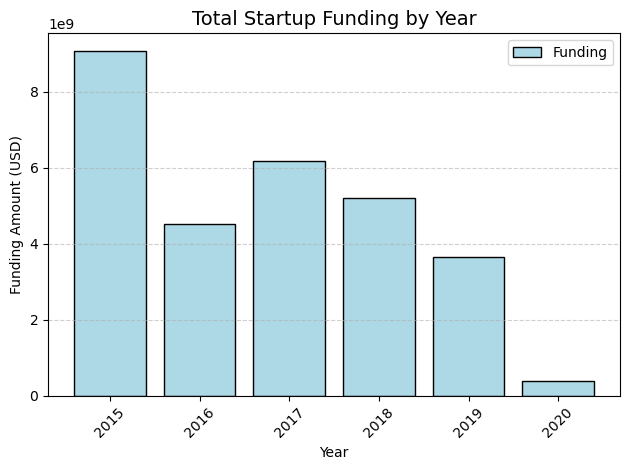

In [ ]:
# Phase 5 - Visualization 

# 1. Total funding by year

import matplotlib.pyplot as plt

yearly_fund = df.groupby('Year')['Amount_in_USD'].sum().sort_index()

plt.bar(yearly_fund.index, yearly_fund.values, color='lightblue', edgecolor='black', label='Funding')

plt.title("Total Startup Funding by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Funding Amount (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig('Total Startup funding by year.jpg')
plt.show()

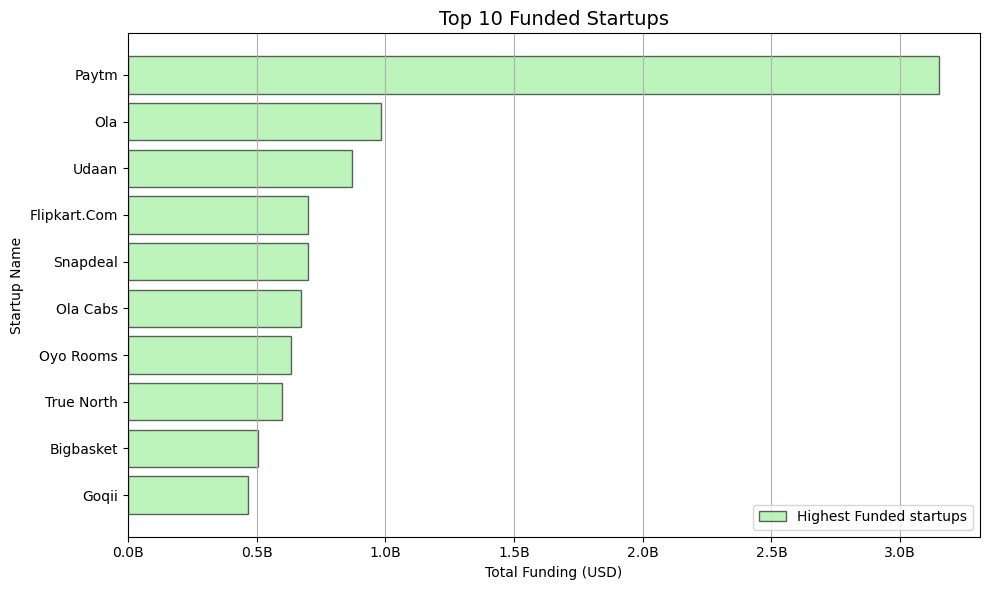

In [189]:
# 2. Top 10 Funded Startups - Horizontal Bar Chart

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

top_10 = df.groupby('Startup_Name')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_10.index[::-1],
    top_10.values[::-1],
    color='lightgreen',
    edgecolor='black',
    linestyle='-',
    alpha=0.6,
    label = 'Highest Funded startups'
)

ax.set_title('Top 10 Funded Startups', fontsize=14)
ax.set_xlabel("Total Funding (USD)")
ax.set_ylabel("Startup Name")
ax.grid(axis='x')
ax.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))

plt.tight_layout()
plt.savefig("Top 10 Funded Startups.jpg")
plt.show()

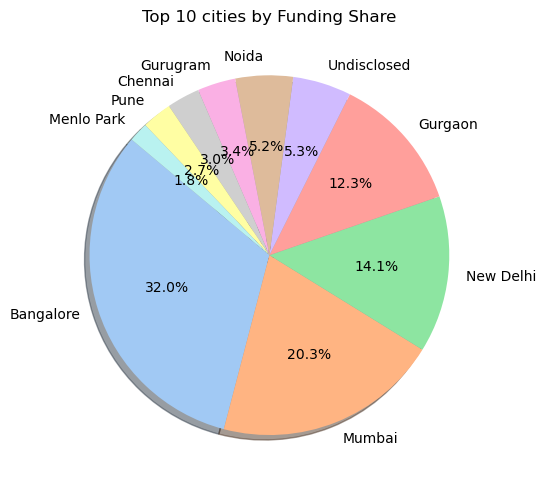

In [190]:
# 3. Funding by Top 10 cities

import matplotlib.pyplot as plt
import seaborn as sns

top_cities = df.groupby('City__Location')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))

plt.pie(
    top_cities.values,
    labels = top_cities.index,
    autopct='%1.1f%%',
    startangle=140,
    colors= sns.color_palette('pastel'),
    shadow=True
)

plt.title("Top 10 cities by Funding Share")
plt.tight_layout()
plt.savefig("Top 10 Funding Cities.jpg")
plt.show()

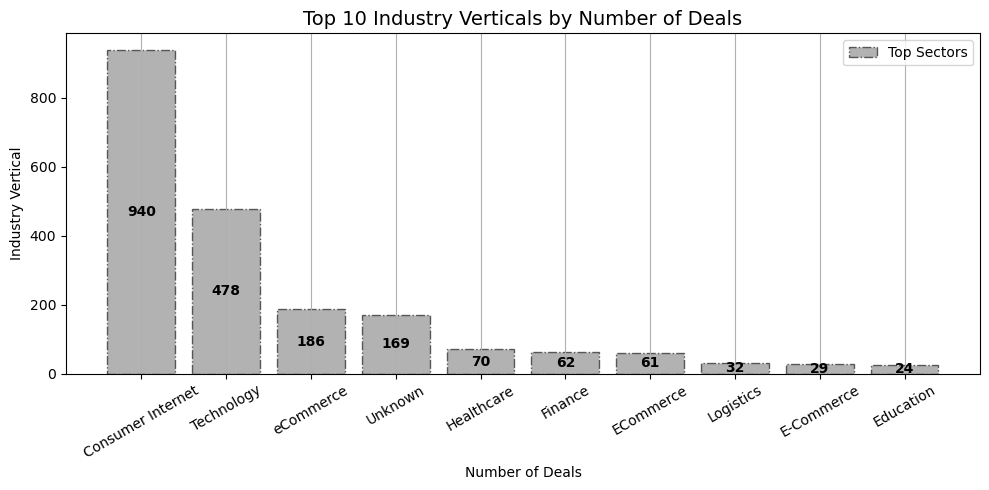

In [217]:
# 4. Top Sectors by Number of Deals

import matplotlib.pyplot as plt

top_sectors = df['Industry_Vertical'].value_counts().head(10)

plt.figure(figsize=(10, 5))

bars = plt.bar(
    top_sectors.index,
    top_sectors.values,
    color='gray',
    edgecolor = 'black',
    linestyle='-.',
    alpha = 0.6,
    label = 'Top Sectors'
)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{int(height)}',
             ha='center', va='center', color='black', fontsize=10, fontweight='bold')

plt.title("Top 10 Industry Verticals by Number of Deals", fontsize=14)
plt.xlabel("Number of Deals")
plt.ylabel("Industry Vertical")
plt.grid(axis='x')
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("Top Sectors by Number of Deals")
plt.show()

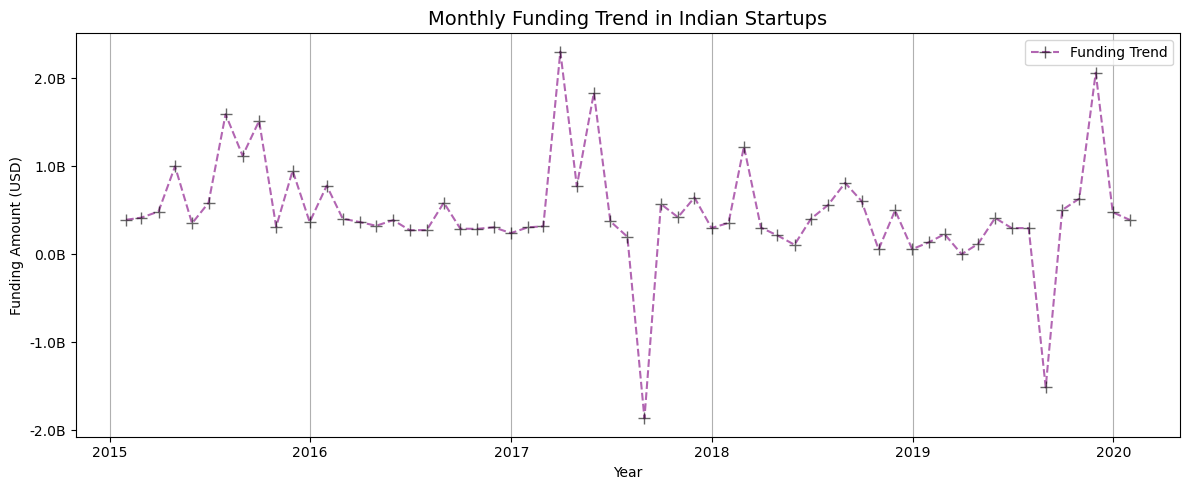

In [220]:
# 5. Monthly Funding Trend Over Time 

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

monthly_fund = df['Amount_in_USD'].resample('M').sum()

fig ,ax = plt.subplots(figsize=(12, 5))

ax.plot(
    monthly_fund.index,
    monthly_fund.values,
    color='purple',
    linewidth=1.5,
    marker = '+',
    markersize = 8,
    markerfacecolor = 'red',
    markeredgecolor = 'black',
    label = 'Funding Trend',
    linestyle = '--',
    alpha = 0.6
)

ax.set_title('Monthly Funding Trend in Indian Startups', fontsize = 14)
ax.set_xlabel('Year')
ax.set_ylabel('Funding Amount (USD)')
ax.grid(axis='x')
ax.legend()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))

plt.tight_layout()
plt.savefig("Monthly Funding Trend over Time.jpg")
plt.show()


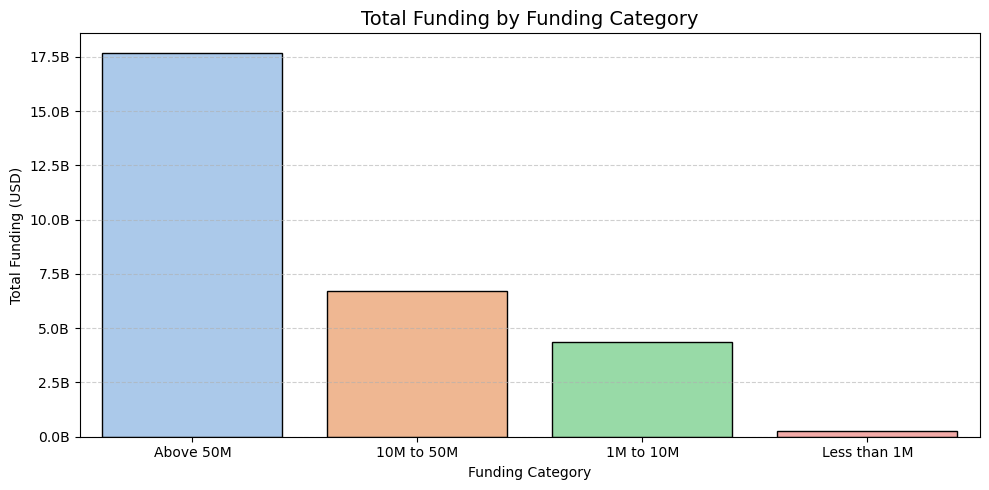

In [228]:
# 6. Funding Category Vs Total Funding

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

total_fund_category = df.groupby('Funding_category')['Amount_in_USD'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x = total_fund_category.index, y = total_fund_category.values, palette='pastel', edgecolor = 'black')

ax.set_title("Total Funding by Funding Category", fontsize = 14)
ax.set_xlabel("Funding Category")
ax.set_ylabel("Total Funding (USD)")
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 1e-9:.1f}B'))
plt.tight_layout()
plt.savefig("Funding Category vs Total Funding")
plt.show()
